C:\Users\jiyun\anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The following kwargs were not used by contour: 'clim'
C:\Users\jiyun\anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: The following kwargs were not used by contour: 'clim'


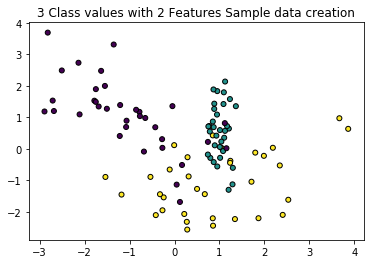

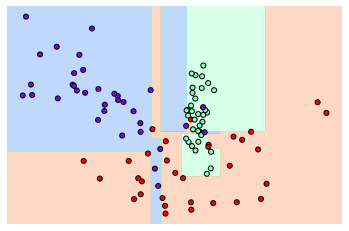

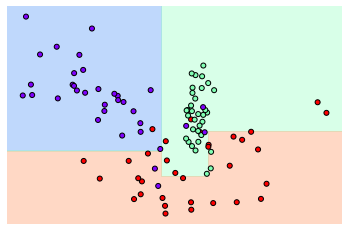

In [7]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 피처는 2개, 클래스는 3가지 유형인 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant = 0, n_informative=2, n_classes = 3, n_clusters_per_class = 1,
                                          random_state = 0)

plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s = 25, edgecolor='k')


from sklearn.tree import DecisionTreeClassifier

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

    
# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf, X_features, y_labels)


# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

